# Ilustration of cell merging

This notebook illustrates the merging of cells for the example of a 6-sided cell that is merged with a 5-sided cell. It corresponds to Figures 2 (d) and Supplementary Figure S3 (e) - (i) of Glassmeier & Feingold (2017).

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys, pickle
import random as rand
import pyvoro as pv
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (4, 4)
if '..' not in sys.path: sys.path.append('..')
import numpy as np
import networkx as nx
import trafo
import scar

def pol2cart(rho, phi, origin):
    x = rho * np.cos(phi) + origin[0]
    y = rho * np.sin(phi) + origin[1]
    return(x, y)

In [2]:
XMAX = YMAX = 1.1
PERIODIC = False

## Prepare an initial network

Create a hexagonal network with an embedded 5-sided cell.

In [3]:
centers = [(0.5,0.5)] # the central, 6-sided, cell
angle = 2.*np.pi / 6.

# create neighboring cells
for n in range(6):
    centers += [pol2cart(0.2,n*angle, centers[0])]

# create second shell
for n in range(5):
    centers += [pol2cart(0.4,n*angle, centers[0])]
    centers += [pol2cart(0.4,n*angle+angle/2., centers[0])]
    
# create third shell
for n in range(5):
    centers += [pol2cart(0.45,n*angle, centers[0])]
    centers += [pol2cart(0.45,n*angle+angle/2., centers[0])]
    centers += [pol2cart(0.45,n*angle+angle/4., centers[0])]
    centers += [pol2cart(0.45,n*angle+3.*angle/4., centers[0])]
    
# perform Voronoi tesselation based on cell centers
vor = pv.compute_2d_voronoi(centers, [[0, XMAX], [0, YMAX]], max(XMAX, YMAX), periodic=[PERIODIC, PERIODIC])

# convert Voronoi tesselation into cellular network data structure
G = trafo.create_graph_from_vor(vor, periodic=PERIODIC, xmin=0, xmax=XMAX, ymin=0, ymax=YMAX)
Gini = G.copy()

## Merge cells

Merge the 5-sided cell (cell 1) with a neighboring 6-sided cell (cell 0).

multicollapsemerge: initial graph


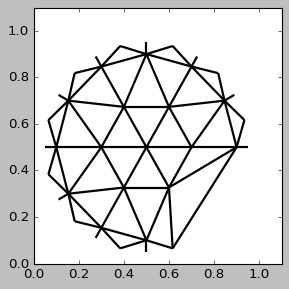

multireduction: entering
multireduction: edge flipped


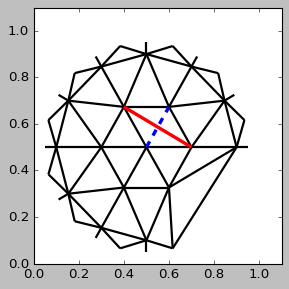

multireduction: edge flipped


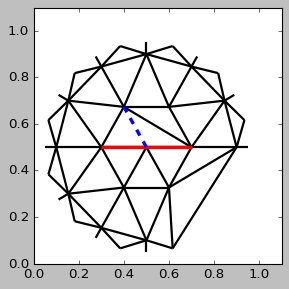

multireduction: edge flipped


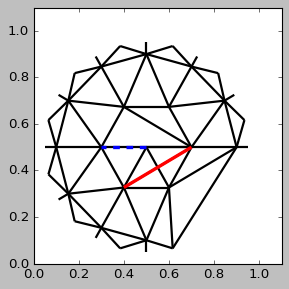

multireduction: done
multicollapsemerge: node removed


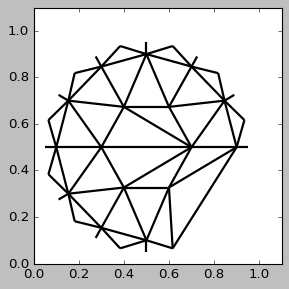

multicollapsemerge: done


In [4]:
rand.seed(531)
trafo.cellmerge(G, 0, True, PERIODIC, merge_partners=[1], debug=True)

## Show the triangulation (dual network) before and after merging

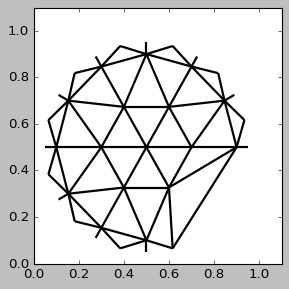

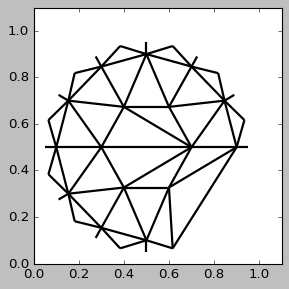

In [5]:
trafo.plot_triangulation(Gini, xmax=XMAX, ymax=YMAX)
trafo.plot_triangulation(G, xmax=XMAX, ymax=YMAX)

## Show the topological scar (sidedness difference) of the cell merging

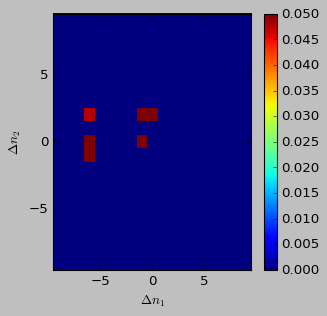

In [6]:
scar.plot_degree_difference_histogram(*scar.degree_difference_stat(scar.degree_difference_graph(G, Gini)))